In [1]:
import matplotlib.pyplot as plt
from core import load_and_process_data, get_metrics

# Visualizing

In [2]:
df = load_and_process_data()

In [3]:
dates, prices, lots, sum_prices = get_metrics(df)

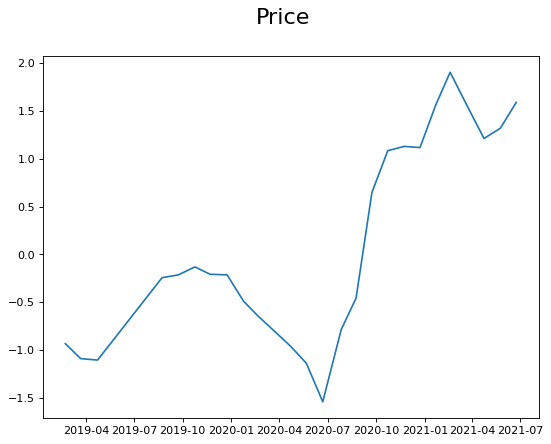

In [4]:
f = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(dates, prices)
f.suptitle('Price', fontsize=20)
plt.show()

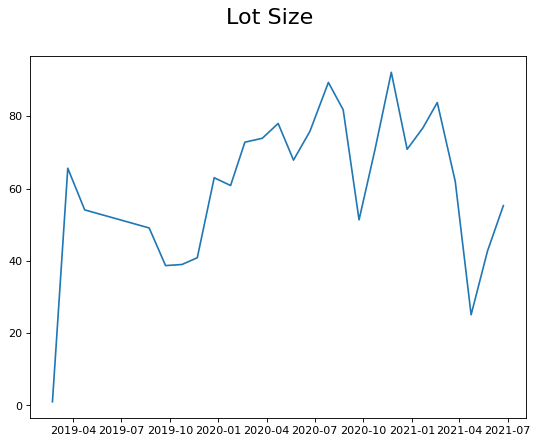

In [5]:
f = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(dates, lots)
f.suptitle('Lot Size', fontsize=20)
plt.show()

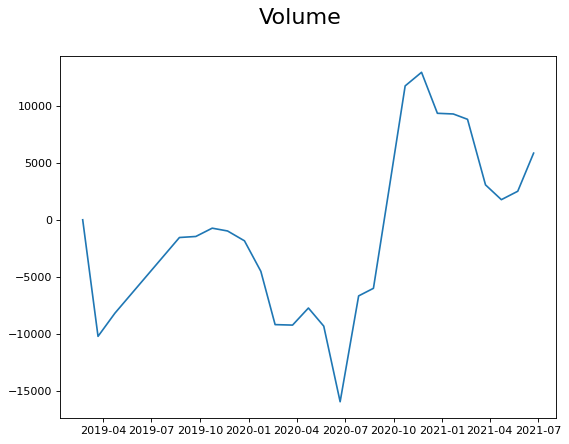

In [6]:
f = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(dates, sum_prices)
f.suptitle('Volume', fontsize=20)
plt.show()

In [7]:
from core import get_sessions_vectors

sessions = get_sessions_vectors(df)

In [8]:
from core import plot_clusters, plot_vectors

# Clustering

t-SNE is used for dimensionality reduction. Vectors from sessions are constructed as 60 average prices during each minute.

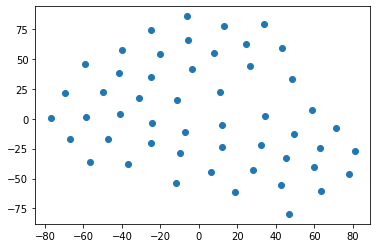

In [9]:
plot_clusters(sessions, 'cosine')

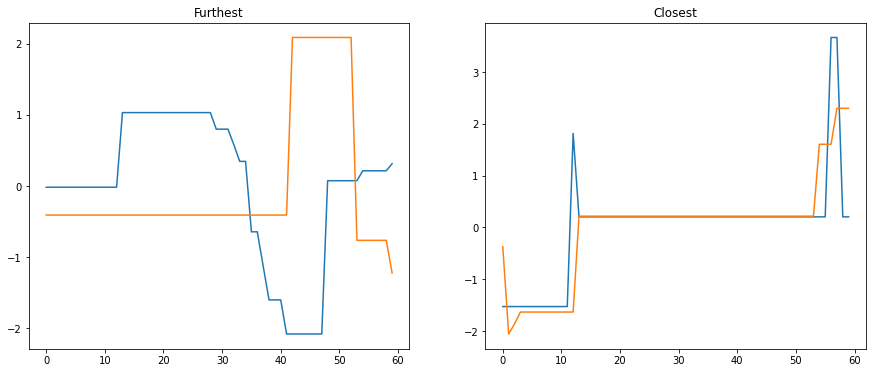

In [10]:
plot_vectors(sessions, 'cosine')

There are no distinct clusters using cosine metric, but we can see that similar vectors are indeed very similar in dynamics and furtherst vectors have opposite trends during 60 minute sessions.

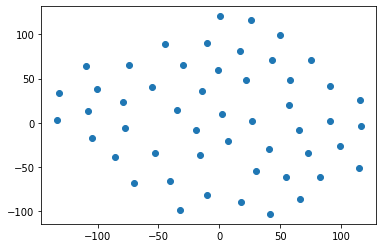

In [11]:
plot_clusters(sessions, 'dtw')

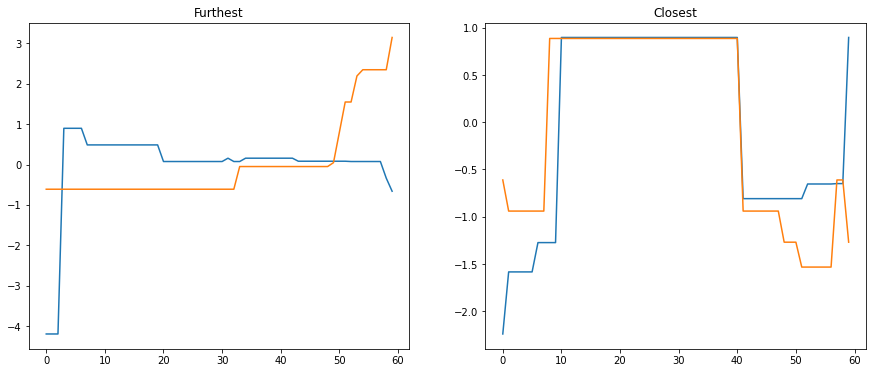

In [13]:
plot_vectors(sessions, 'dtw')

DTW metric does not produce good clustering either.  We can see that furthest vectors indeed have different dynamics, but closest vectors are not so similar. It is possible that sessions with small number of transactions, which have long periods of constant price, introduce noise in distances. We want to catch similiraties in changes of price, but DTW also counts long periods of constant price as similarity.

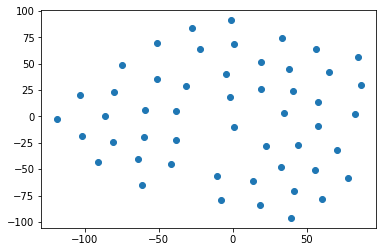

In [16]:
plot_clusters(sessions, 'euclidean')

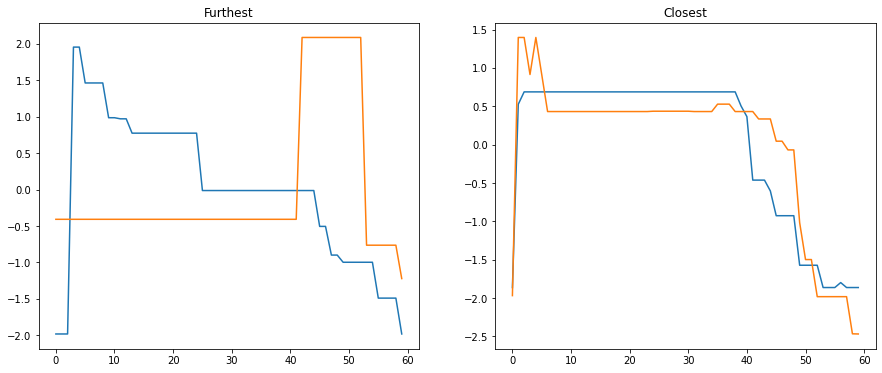

In [17]:
plot_vectors(sessions, 'euclidean')

Euclidean distance surprisingly looks better than others. We can see two clear clusters and closest sessions looks very similar in dynamic, while furthest very different. However, obvious problem is that it is still does not account for shifting. A hypothesis is that we might not need to account for it during hour sessions as it has continuous dynamics from start to finish with patterns that are tied to particular time, e.g. during start of the session prices are usually rise or fall quickly, stagnation of prices in the middle, etc.